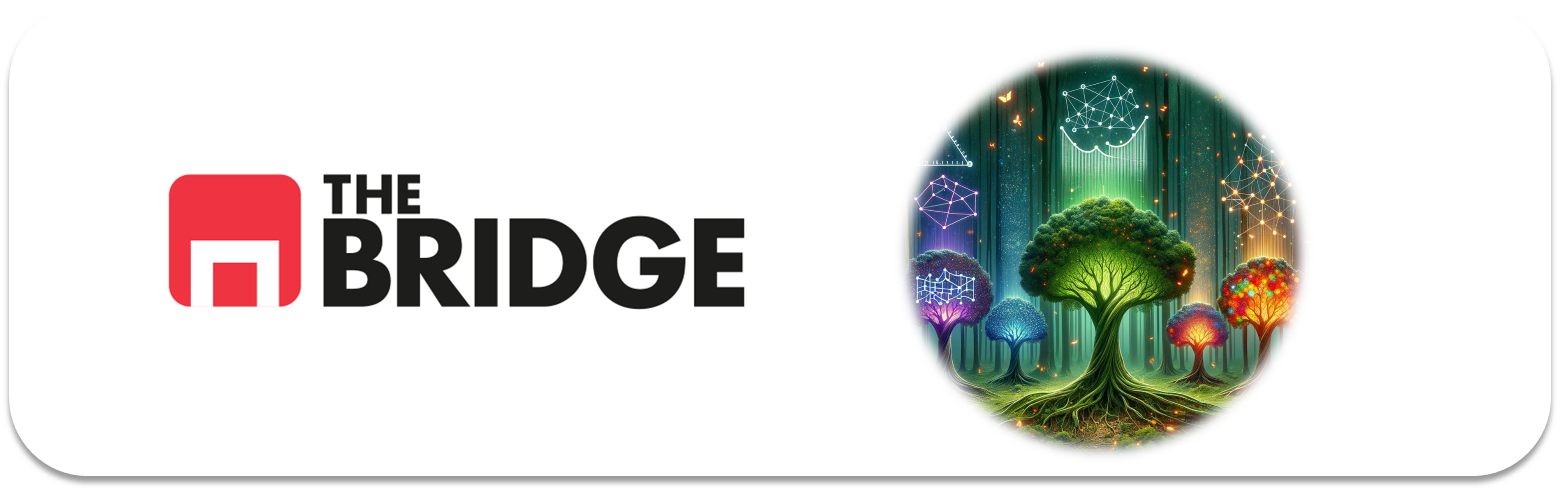

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

# 1.- Cargar los datos

In [2]:
df = pd.read_csv("./data/bank-full.csv", sep = ";")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Variables numéricas (int o float)
vars_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables numéricas:", vars_numericas)

Variables numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [5]:
# Variables categóricas con solo 2 valores únicos: candidatas a binarias
vars_binarias = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
print("Variables binarias:", vars_binarias)

Variables binarias: ['default', 'housing', 'loan', 'y']


In [6]:
print(df["default"].value_counts())
print("\n", df["housing"].value_counts())
print("\n", df["loan"].value_counts())
print("\n", df["y"].value_counts())

default
no     44396
yes      815
Name: count, dtype: int64

 housing
yes    25130
no     20081
Name: count, dtype: int64

 loan
no     37967
yes     7244
Name: count, dtype: int64

 y
no     39922
yes     5289
Name: count, dtype: int64


# 2.- Identificar el target (y) y analizar su distribución

Aunque la variable y no está formalmente documentada en las notas del banco, dadas su naturaleza binaria, su distribución, su denominación, y el objetivo explícito del ejercicio, se decide trabajar con `y` como la variable objetivo a predecir.

En un entorno real, este tipo de suposición siempre debe ser validada con el equipo responsable del dato para evitar errores de interpretación

In [7]:
# Distribución porcentual
df["y"].value_counts(normalize=True).round(3) * 100

y
no     88.3
yes    11.7
Name: proportion, dtype: float64

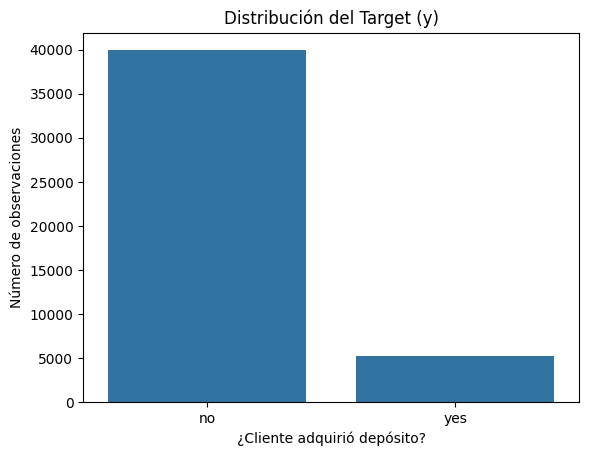

In [8]:
sns.countplot(x="y", data=df)
plt.title("Distribución del Target (y)")
plt.ylabel("Número de observaciones")
plt.xlabel("¿Cliente adquirió depósito?")
plt.show()

# 3. Separar variables numéricas y categóricas

In [9]:
# Variables numéricas (int o float)
vars_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Variables binarias (categóricas con solo dos valores)
vars_binarias = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

# Variables categóricas no binarias
vars_categoricas = [
    col for col in df.select_dtypes(include='object').columns
    if col not in vars_binarias + ['y']  # excluye las binarias y el target
]

print("Numéricas:", vars_numericas)
print("Binarias:", vars_binarias)
print("Categóricas:", vars_categoricas)

Numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Binarias: ['default', 'housing', 'loan', 'y']
Categóricas: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


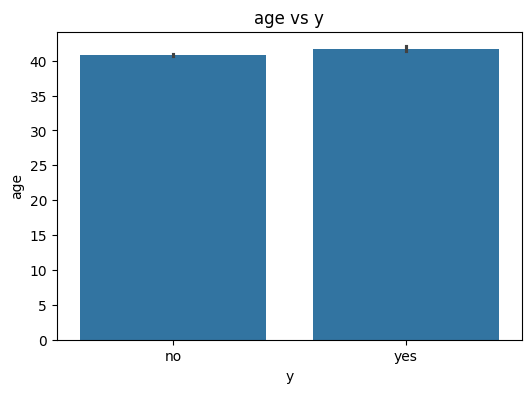

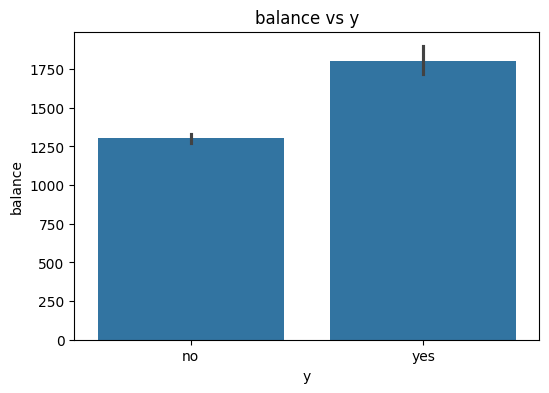

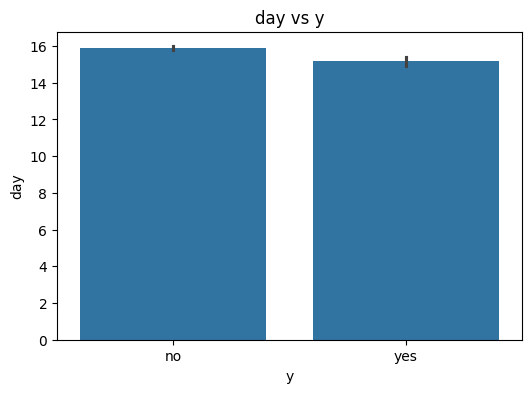

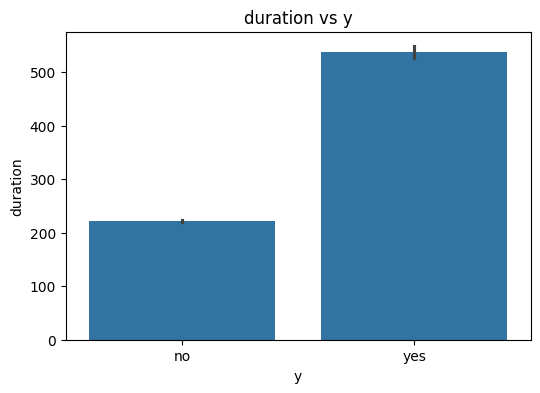

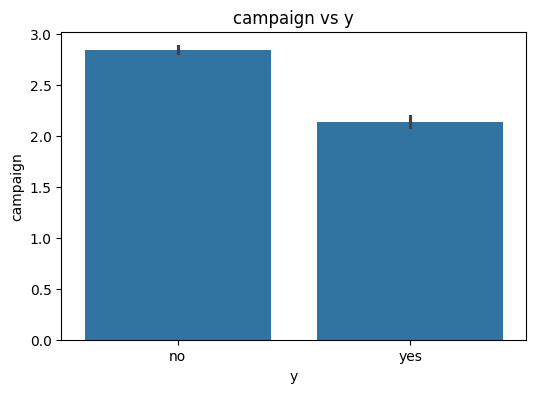

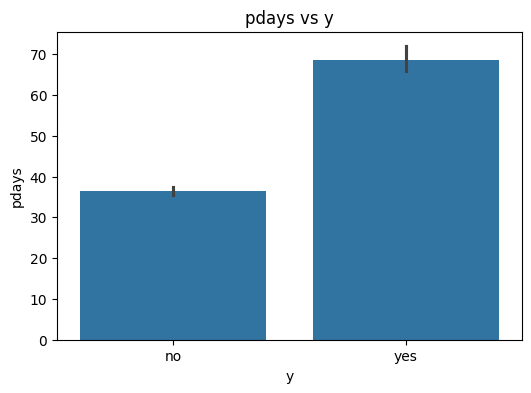

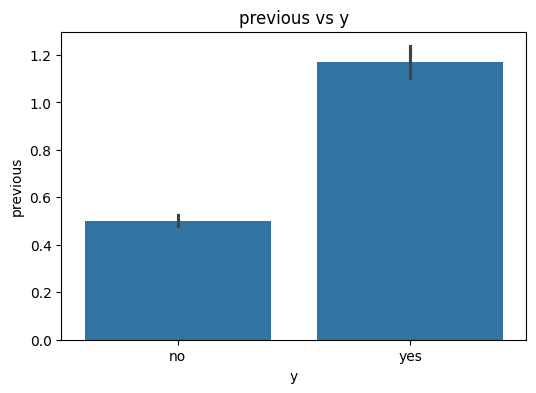

In [10]:
for col in vars_numericas:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='y', y=col, data=df)
    plt.title(f"{col} vs y")
    plt.show()

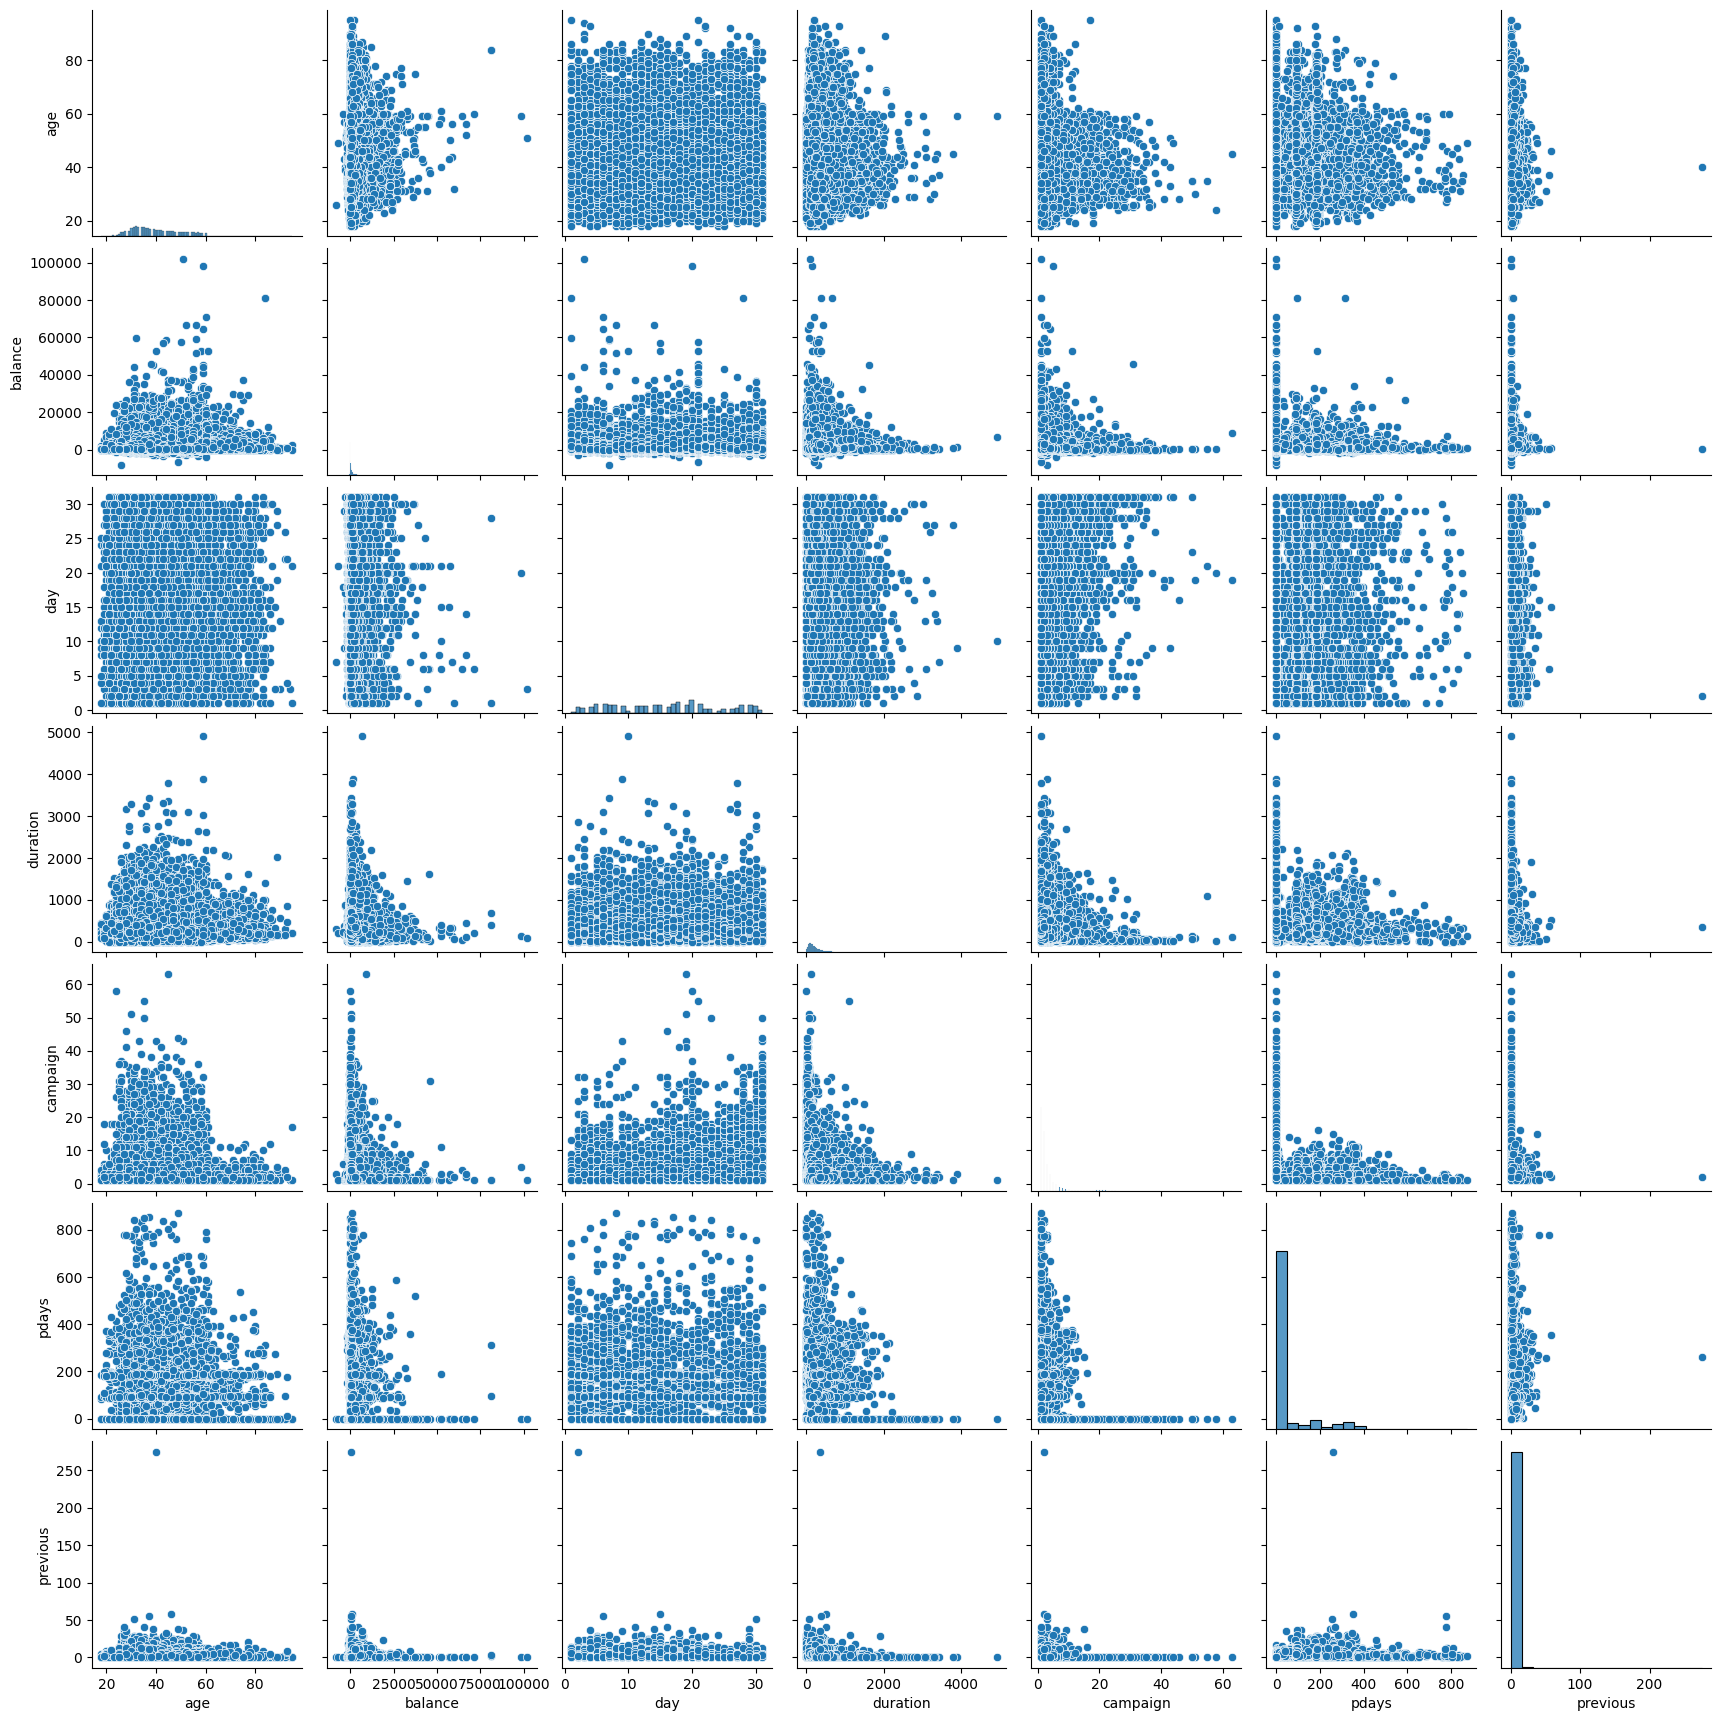

In [14]:
sns.pairplot(df)


--- Análisis de la variable categórica: job ---


y,no,yes
job,,
admin.,87.80%,12.20%
blue-collar,92.73%,7.27%
entrepreneur,91.73%,8.27%
housemaid,91.21%,8.79%
management,86.24%,13.76%
retired,77.21%,22.79%
self-employed,88.16%,11.84%
services,91.12%,8.88%
student,71.32%,28.68%


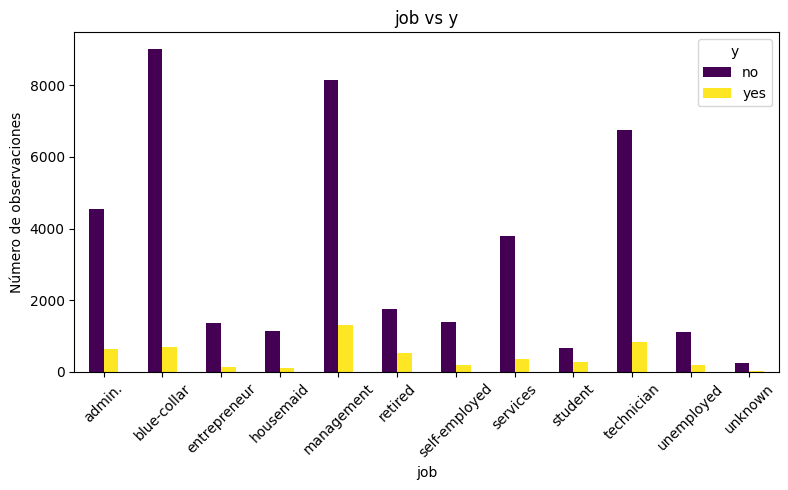


--- Análisis de la variable categórica: marital ---


y,no,yes
marital,,
divorced,88.05%,11.95%
married,89.88%,10.12%
single,85.05%,14.95%


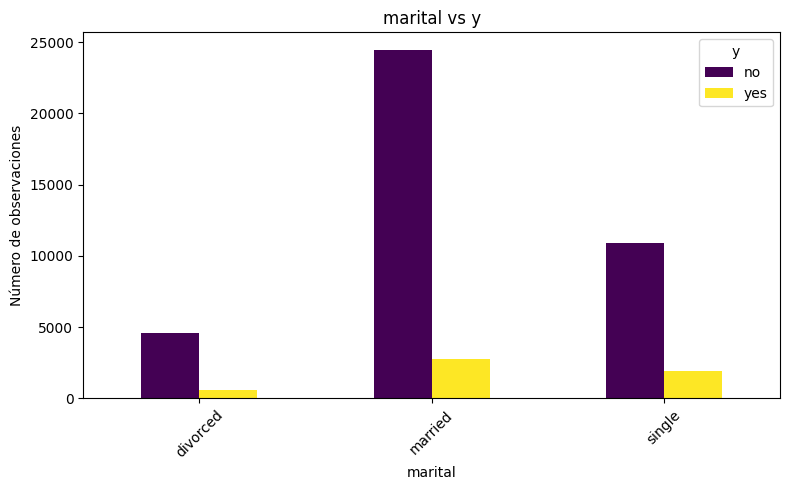


--- Análisis de la variable categórica: education ---


y,no,yes
education,,
primary,91.37%,8.63%
secondary,89.44%,10.56%
tertiary,84.99%,15.01%
unknown,86.43%,13.57%


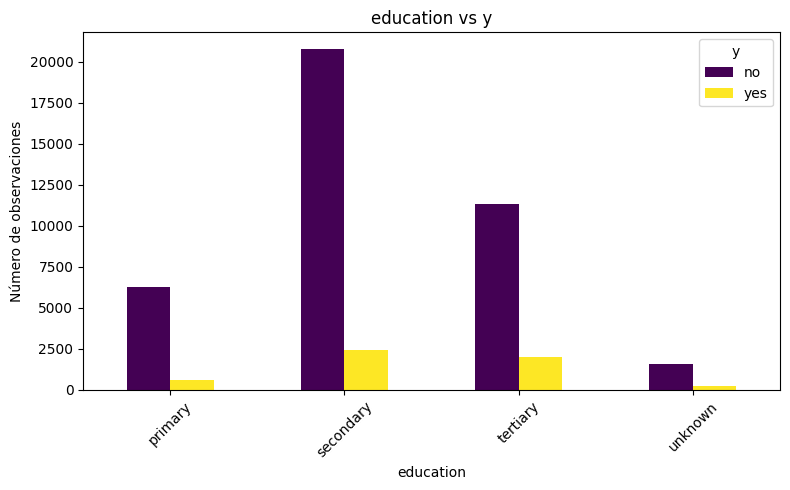


--- Análisis de la variable categórica: contact ---


y,no,yes
contact,,
cellular,85.08%,14.92%
telephone,86.58%,13.42%
unknown,95.93%,4.07%


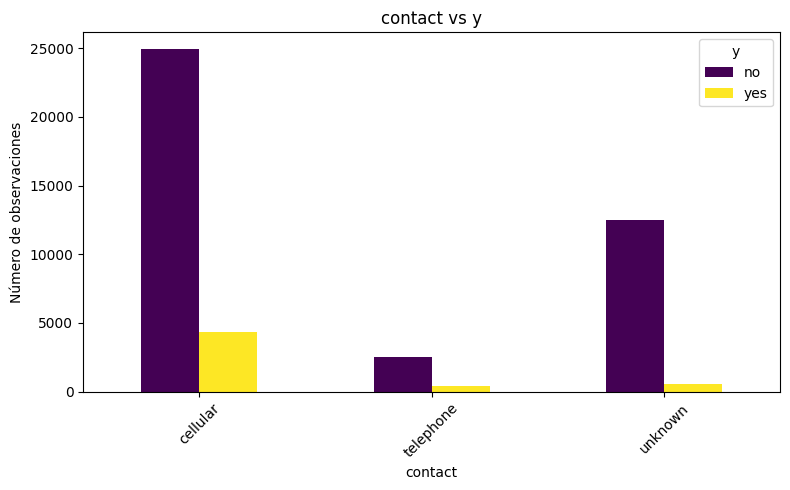


--- Análisis de la variable categórica: month ---


y,no,yes
month,,
apr,80.32%,19.68%
aug,88.99%,11.01%
dec,53.27%,46.73%
feb,83.35%,16.65%
jan,89.88%,10.12%
jul,90.91%,9.09%
jun,89.78%,10.22%
mar,48.01%,51.99%
may,93.28%,6.72%


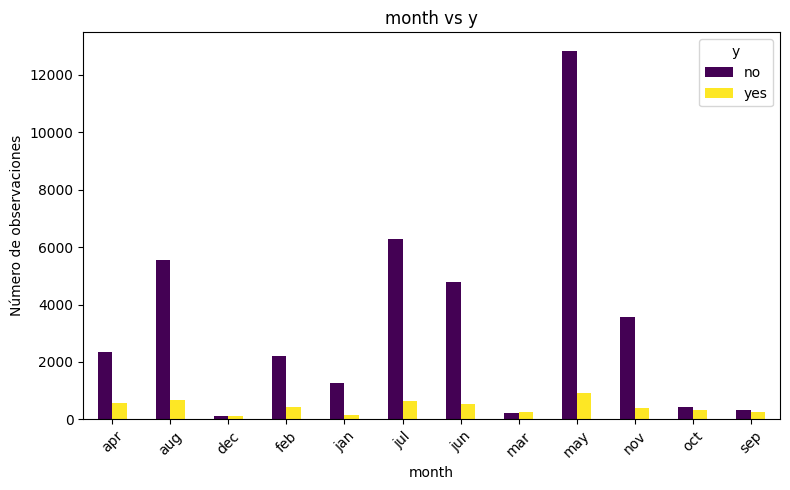


--- Análisis de la variable categórica: poutcome ---


y,no,yes
poutcome,,
failure,87.39%,12.61%
other,83.32%,16.68%
success,35.27%,64.73%
unknown,90.84%,9.16%


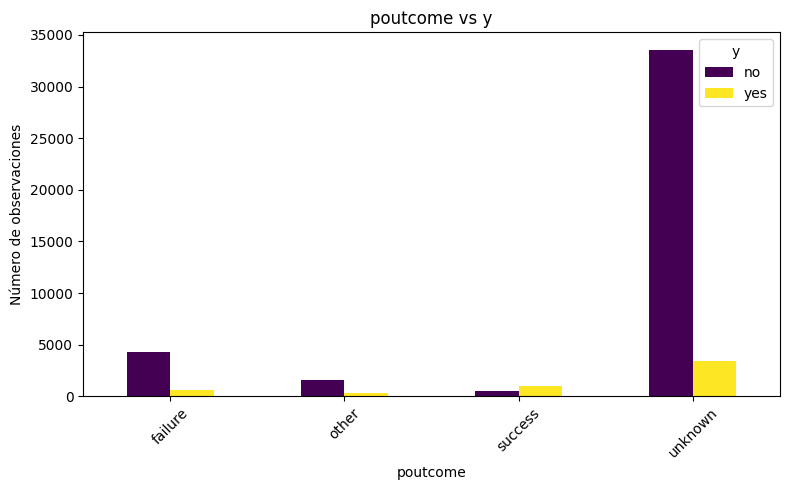

In [11]:
def analizar_categorica_vs_target(df, variable, target='y'):
    """
    Muestra tabla de proporciones de target por categoría
    y un gráfico de barras apiladas para una variable categórica.
    
    Parámetros:
    df : pd.DataFrame
        El dataframe con los datos.
    variable : str
        El nombre de la variable categórica a analizar.
    target : str
        El nombre de la variable objetivo (por defecto 'y').
    """

    print(f"\n--- Análisis de la variable categórica: {variable} ---")

    # Tabla de proporciones (target por categoría)
    tabla = pd.crosstab(df[variable], df[target], normalize='index')
    display(tabla.style.format("{:.2%}"))

    # Gráfico de barras apiladas
    conteo = pd.crosstab(df[variable], df[target])
    conteo.plot(kind='bar', figsize=(8, 5), colormap='viridis')
    plt.title(f"{variable} vs {target}")
    plt.xlabel(variable)
    plt.ylabel("Número de observaciones")
    plt.legend(title=target)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Bucle
for col in vars_categoricas:
    analizar_categorica_vs_target(df, col)


Viendo los gráficos de las variables numéricas contra el target, "age" y "day" no parecen discriminar, muestran prácticamente los mismos valores para "yes" y "no" del target. 

El resto, es cierto que hay algunas que muestran más diferencias entre el sí y no que otras, pero parece que todas tienen diferencias en sus proporciones. 

Lo mismo con las categóricas, se puede observar sobre todo la gran desigualdad de respuesta de "yes" y "no", siendo mucho mayor el segundo.
 
 - "job" parece que sí, sobre todo porque (aunque las respuestas del "no" son más o menos similares en las diferentes clases), sí que hay un aumento notable de las respuestas "yes" para "student" y "retired". 
 - "Marital", parece más o menos igual para el "yes" del 10.12% al 14.95% y "no" del 85,05% al 89,88%, no parece demasiado discriminatorio. 
 - "Education", similar, quizás con un poco más de variabilidad para el "yes": 8.63%- 15.01%. "Contact" algo más: 85.08%-95,93% para le "no" y 4,07%-14,92% para el "yes". 
 - "Month definitivamente sí y "poutcome", también. 

# 4. Decidir qué transformaciones aplicar a cada grupo

Objetivos:

- Transformar variables binarias y el target.

- Separar X e y.

- Dividir en entrenamiento y test de forma estratificada.

- Obtener un dataset limpio y listo para entrenar el modelo base.

In [ ]:
# Codificar las variables binarias (yes/no) como 1/0
print(vars_binarias)

df[vars_binarias] = df[vars_binarias].replace({"yes":1, "no":0})

['default', 'housing', 'loan', 'y']


In [26]:
df[vars_binarias]

,default,housing,loan,y
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


In [31]:
# Separar X (features) e y (target)
X = df.drop(columns='y')
y = df['y']

In [32]:
# Dividir en train/test usando 'stratify = y' 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state= 42, 
                                                    stratify=y) # Mantener proporción original de clases

In [33]:
# Codificación one-hot de variables categóricas multiclase
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False)

# Train
onehot_train = onehot.fit_transform(X_train[vars_categoricas])

columnas_codificadas = onehot.get_feature_names_out(vars_categoricas)
print(columnas_codificadas)

X_train = X_train.drop(columns = vars_categoricas)
X_train[columnas_codificadas] = onehot_train

# Test
onehot_test = onehot.transform(X_test[vars_categoricas])
X_test = X_test.drop(columns = vars_categoricas)
X_test[columnas_codificadas] = onehot_test

['job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'education_primary'
 'education_secondary' 'education_tertiary' 'education_unknown'
 'contact_cellular' 'contact_telephone' 'contact_unknown' 'month_apr'
 'month_aug' 'month_dec' 'month_feb' 'month_jan' 'month_jul' 'month_jun'
 'month_mar' 'month_may' 'month_nov' 'month_oct' 'month_sep'
 'poutcome_failure' 'poutcome_other' 'poutcome_success' 'poutcome_unknown']


# 5.- Modelo -> Árbol de decisión

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento del modelo sin hiperparámetros 
# Se instancia
dtc_base = DecisionTreeClassifier(random_state=42)

# Se entrena
dtc_base.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
# Predicciones y evaluación

from sklearn.metrics import classification_report

# Predicción sobre test
y_pred_base = dtc_base.predict(X_test)

# Informe de clasificiación
print("Rendimiento del Árbol de decisión (modelo base): \n")
print(classification_report(y_test, y_pred_base))

Rendimiento del Árbol de decisión (modelo base): 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.48      0.50      0.49      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



# Optimización de hiperparámetros

In [37]:
from scipy.stats import randint

# Grid de búsqueda razonado
parametros_arbol = {
    'max_depth': [None] + list(range(3, 11)),         # profundidad controlada
    'min_samples_split': [2, 4, 8, 16],                # mínimo de muestras para dividir
    'min_samples_leaf': [1, 2, 4, 8],                  # mínimo de muestras por hoja
    'max_features': ['sqrt', 'log2', None]            # control de features en cada split
}

In [38]:
from sklearn.model_selection import RandomizedSearchCV

arbol = DecisionTreeClassifier(random_state=42)

search_arbol = RandomizedSearchCV(
    estimator=arbol,
    param_distributions=parametros_arbol,
    n_iter=25,
    cv=5,
    scoring='f1',  # Métrica que da equilibrio a precision y recall - No basta con accuracy: el dataset está desbalanceado.
    random_state=42,
    verbose=1,
    n_jobs=-1
)

search_arbol.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8, 16]},
                   random_state=42, scoring='f1', verbose=1)

In [39]:
# Modelo optimizado
mejor_arbol = search_arbol.best_estimator_

# Predicción
y_pred_opt = mejor_arbol.predict(X_test)

# Informe
print("Mejores hiperparámetros:", search_arbol.best_params_)
print("\nRendimiento del Árbol de Decisión optimizado:")
print(classification_report(y_test, y_pred_opt, digits=3))

Mejores hiperparámetros: {'min_samples_split': 16, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}

Rendimiento del Árbol de Decisión optimizado:
              precision    recall  f1-score   support

           0      0.928     0.947     0.938      7985
           1      0.528     0.446     0.484      1058

    accuracy                          0.889      9043
   macro avg      0.728     0.697     0.711      9043
weighted avg      0.881     0.889     0.884      9043

